<a href="https://colab.research.google.com/github/hanna-joo/statistics/blob/master/stat_python/ch_13_classification_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13장. 분류예측분석

- 관찰 개체들을 임의의 개수 집단으로 분류할 때 사용하는 분석기법

## 13.1 분류예측분석 기초
- 대부분의 종속변수는 명목형 척도
  - 이를 예측하기 위한 __선형판별분석, 로지스틱 회귀분석__

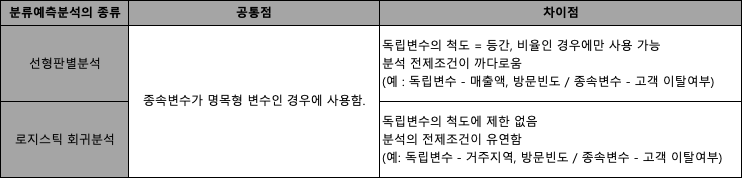

### 분류예측의 정확도 평가
- 결과에 대한 예측정확도 확인
  - 목표 집단으로 예측된 관측치와 실제 해당 집단에 속한 관측치가 정리된 분류행렬표 작성을 통해 평가

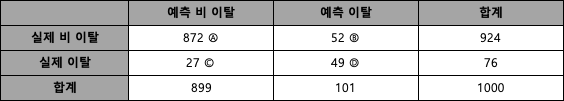

- 주어진 분류행렬표를 통해 예측정확도 평가
  - 모형 정확도
  - 양성 정확도
  - 음성 정확도
  - 민감도
  - 특이도

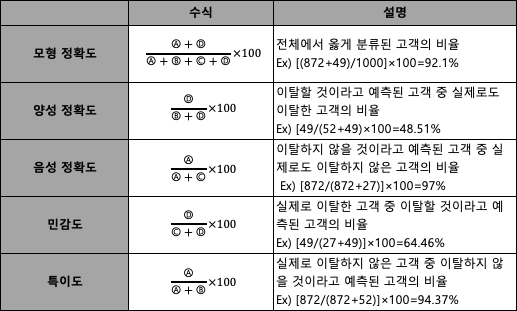

## 13.2 선형판별분석
- 이미 분류되어 있는 집단 사이의 차이를 설명하는 독립변수 검증
- 이런 변수들의 선형결합으로 이루어진 __판별식 또는 판별함수__를 통해 집단 분류 예측하는 기법

### [1] 개념 및 주요 이론
- 독립변수가 등간, 비율척도로만 구성되어야 한다는 제약조건
  - 이러한 몇 가지 전제조건이 갖춰진 상황에서는 우수한 판별력을 보임

#### 선형판별식
- 두 개 이상의 집단을 구분하는데 있어 분류오류를 최소화하는 독립변수들의 함수적 선형결합모형을 의미

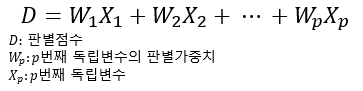

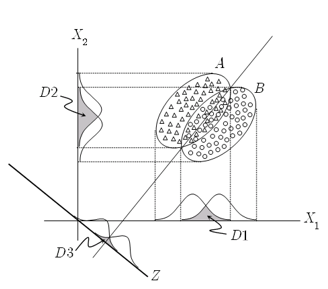

- 두 개의 집단 A, B 존재
  - X₁과 X₂를 이용하여 그룹 A와 B를 효과적으로 분류하기 어렵다.
  - 그러나 X₁과 X₂를 이용하여 Z라는 새로운 차원을 생성
    - 훨씬 효과적인 분류 가능할 것
- 즉, 선형판별분석은 개별독립변수들의 조합으로 주어진 __집단을 효과적으로 분류할 수 있는 새로운 가상의 축 (기준)을 형성__하는 과정

- 그러나 실제로, 집단을 나누는 하나의 판별식을 도출하는 것이 아닌, __각 집단에 적용되는 판별식을 각각 도출, 판별식에 의한 판별점수를 비교하여 집단을 분류__
  - 예 : 집단 A에 해당하는 판별식과 집단 B에 해당하는 판별식을 각각 만듦
  - 한 사례(예: 고객)에 대해 두 개의 판별점수를 도출
  - A 판별점수가 B 판별점수보다 클 경우 A 집단으로 판별

#### 선형판별분석을 위한 전제조건

① 독립변수는 정규분포를 따라야 한다.  
- 독립변수가 정규성을 띄지 않는 경우, 선형판별식의 예측 정확도가 낮을뿐만 아니라, 분석모형 자체가 유의하게 나오지 않는 경우가 많음  

② 종속변수와 독립변수는 상관관계를 가져야 한다.  
- 회귀분석과 마찬가지로 종속변수와 독립변수간의 상관관계가 존재한다는 가정에서 출발  

③ 독립변수들 사이에 상관관계가 없거나 작아야 한다.  
- 다중회귀분석과 마찬가지로 다중공선성의 문제가 발생하므로 독립변수간 상관관계는 없거나 작아야 함  

④ 종속변수로 구분되는 각 집단 별 공분산 행렬이 유사해야 한다.  
- 집단을 예측하는 분석이므로 공분산 행렬이 큰 집단이 판별모형에 영향을 많이 주게 됨
- 따라서 각 집단의 공분산 행렬이 비슷해야 더 좋은 분석결과를 얻을 수 있음

- 그러나, 실제 데이터는 정규분포를 따르지 않거나, 집단간 공분산 행렬이 유사하지 않는 경우가 많다.
  - 이 때문에 실제 데이터 분석가 입장에서는 로지스틱 회귀분석이나 의사결정나무 분석을 선호하는 경향이 큼

### [2] 분석 및 해석
- 쇼핑몰은 고객이탈을 효과적으로 예측하고자 고객들의 거래이력 데이터 활용
- 독립변수 = 방문빈도, 1회 평균매출액, 거래기간
- 귀무가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 주지 않는다
- 연구가설 = 방문빈도와 1회 평균매출액, 거래기간은 이탈에 영향을 준다

In [ ]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [ ]:
# 2. 종속변수와 독립변수 구분하기
X=df[['방문빈도','1회_평균매출액','거래기간']]
Y=df[['이탈여부']]

In [ ]:
# 3. 선형판별분석
lda=LDA().fit(X,Y) #독립변수, 종속변수

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 4. 예측결과
print('판별식 선형계수 : ', np.round(lda.coef_,3))
print('\n판별식 절편 : ', np.round(lda.intercept_,3))
print('\n예측결과 : \n', pd.DataFrame(lda.predict(X)))
print('\n예측스코어 : \n', pd.DataFrame(lda.predict_proba(X)))
print('\n에측 정확도 :',lda.score(X, Y))

판별식 선형계수 :  [[ 0.086  0.    -0.096]]

판별식 절편 :  [72.916]

예측결과 : 
      0
0    0
1    1
2    0
3    0
4    0
..  ..
995  0
996  0
997  0
998  0
999  0

[1000 rows x 1 columns]

예측스코어 : 
                 0             1
0    1.000000e+00  2.208135e-13
1    1.370801e-10  1.000000e+00
2    1.000000e+00  1.999582e-13
3    1.000000e+00  7.951807e-11
4    1.000000e+00  1.309479e-11
..            ...           ...
995  1.000000e+00  2.283614e-12
996  1.000000e+00  1.727200e-10
997  1.000000e+00  3.609038e-14
998  1.000000e+00  8.248046e-13
999  1.000000e+00  6.555998e-13

[1000 rows x 2 columns]

에측 정확도 : 0.986


In [ ]:
# 5. 분류행렬표 출력
cf_m=pd.DataFrame(confusion_matrix(Y, lda.predict(X)))
cf_m.columns=['예측 0','예측 1']
cf_m.index=['실제 0','실제 1']
print('\n분류행렬표\n')
cf_m


분류행렬표



,예측 0,예측 1
실제 0,921,12
실제 1,2,65


- 선형판별식
  - D = 72.916 + (8.57912496e-02 * 방문빈도) + (1.02380000e-06 * 1회 평균매출액) - (9.61603449e-02 * 거래기간)

## 13.3 로지스틱 회귀분석
- 선형판별분석의 한계점
  - 판별분석이 제시하는 분석의 전제조건을 실제로 충족하기란 쉽지 않음
  - 독립변수와 종속변수간 관계가 선형적이지 못하는 경우가 다수
  - 독립변수의 정규성을 만족하지 않는 데이터 다수
  - 집단간의 공분ㅅ난 행렬이 동등하지 않는 경우
- 이런 조건을 지키지 않아도 적용할 수 있는 분류예측분석 기법 중 하나가 __로지스틱 회귀분석__

### [1] 개념 및 주요 이론
- 범주형 혹은 명목형 척도로 구성된 종속변수에 대해 분류예측
- 선형함수가 아닌 로짓함수(logit function)을 사용
- 등간/비율척도가 아닌 다른 형태의 변수도 독립변수로 수용 가능

#### 로지스틱 회귀모형
- 특정 집단에 속할 확률 값을 추정, 관측치가 속할 범주를 예측하기 위한 분석 모형

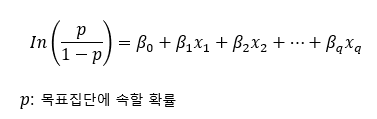

- 목표집단에 속할 확률 자체를 출력하는 것이 아님
  - __로짓함수 즉, 목표집단에 속할 확률과 목표집단에 속하지 않은 확률__의 비율에 자연로그를 취한 값을 출력하여 분류예측을 수행

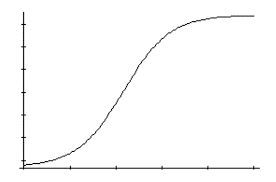

- 독립변수가 증가함에 따라 종속변수의 값이 일정하게 증가하는 것이 아님
  - 일정수준까지 서서히 증가, 일정 수준이 지나면 급격하게 종속변수의 값이 상승하는 형태
- __분류기준값__을 설정하고 (이항 로지스틱 회귀분석인 경우 일반적으로 0.5로 설정) 목표집단에 속할 확률인 P(Y=1)이 분류기준값보다 클 경우 집단1(목표집단)으로, 작을 경우 집단 0으로 분류

#### 로짓함수와 오즈
- 로지스틱 회귀분석 모형에서 좌변항은 직접적인 확률 값이 아닌 로짓함수를 사용함

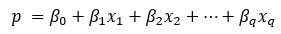

- 만일 위와 같이 단순히 독립변수들의 __선형적인 결합으로 특정집단에 속할 확률을 직접 추정__하고자 한다면 __좌변값은 0과 1사이 값이 아닐 수도 있음__

- 따라서 0과 1사이 값을 취하기 위해서는 다음과 같이 __비선형 함수 형태로 변환__

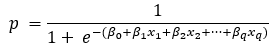

- 우변항을 정리하면 다음과 같은 공식이 수립

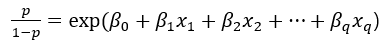

- 좌변 항은 __특정 사건이 발생할 확률과 발생하지 않은 확률의 비율__로서 __오즈(Odds)라고 부름__

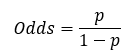

- 그러나 오즈의 값 그대로 로지스틱 분석에서 사용하지 않음
  - p값이 1에 가까워 질수록, 오즈의 값이 무한대로 커지기 때문
- 이러한 문제를 해결하기 위해 __오즈에 자연로그를 취함__

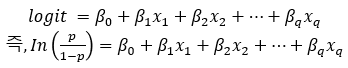

- 독립변수가 증가함에 따라 독립변수의 계수만큼 오즈가 단순히 증가하는 것이 아닌, __1단위의 로짓이 증가__
  - 이 때 회귀계수에 대한 __오즈비__ 개념 사용
    - 독립변수 x의 로지스틱 회귀계수 β를 exp(β)로 변환시킨 값
    - 예: 고객의 이탈여부 예측하는 로지스틱 회귀모형에서 독립변수 = 반품횟수,  
  이 독립변수의 회귀계수가 0.2이면,  
  반품횟수가 1단위 증가할 때 오즈가 0.2배 증가하는 것 X  
  오즈비인 exp(0.2) = 1.22배 만큼 증가


#### 로지스틱 회귀계수 추정 방법
- 일반 선형회귀에서 회귀계수를 추정하기 위해 예측 값과 실제 값의 오차 제곱의 합을 최소로 하는 __최소자승법(LSM,Least Squeares Method)을 사용__
- 로지스틱 회귀분석에서 우도함수를 최대화하는 __최대우도법(MLE,Maximum Likelihood Estimation)__ 사용
  - 우도 : 주어진 표본이 나타날 모수의 가능성

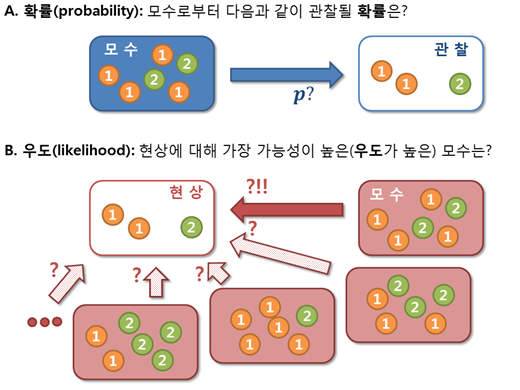
- ref : https://adioshun.gitbooks.io/statics-with-r/content/c6b0-b3c4.html

- 로지스틱 회귀분석에서 사용하는 최대우도법은 이항확률변수 X의 관측값 x에 대한 우도함수

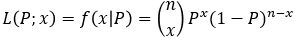

#### 로지스틱 회귀모형의 적합도 검정
- 분석결과로 산출된 회귀모형이 얼마나 적합한지 판단하기 위해 모형의 적합도를 검정

##### ① 우도비 검정 (Log likelihood ratio test)
- 선형 회귀모형에서 모형의 적합도를 판정하는 F검정과 유사한 개념


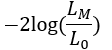

- 최대우도값과 최소우도값을 우도비로 표현
- 해석의 편의성을 위해 -2로그를 취해 카이제곱 분포로 변환하여 판단
- 모델의 적합도가 좋아질수록 0에 가까워지며, 적합도가 나빠질 수록 커지게 됨

##### ② Hosmer & Lemeshow 검정
- 전체사례들의 확률값을 순위화, 10개 그룹으로 분류한 후 각 그룹의 기대 확률과 실제 관측 확률 값을 비교하는 방식 
  - 카이제곱 검정과 유사
- 검정 결과 p < 0.05일 경우 모델에서 추정된 값은 실측 값과 차이가 없다는 귀무가설을 기각
  - 추정된 로지스틱 회귀모형이 주어진 표본자료에 적합하지 않음을 의미

##### ③ 유사 결정계수 (Pseudo-R²)
- 선형 회귀분석에서 종속변수의 분산에 대한 설명력을 나타내는 결정계수(R²)의 개념에 로그우도함수 값을 취한 결정계수


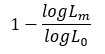

- 0 ~ 1 사이 값으로 산출, 1에 가까울수록 좋은 모형 적합도를 갖음

### [2] 분석 및 해석
- 쇼핑몰 거래기간, Recency, 성별을 이용하여 이탈 예측모형 만들고자 함
- 성별은 명목형 변수이므로 로지스틱 회귀분석을 사용하여야 함
- 귀무가설 = 거래기간, Recency, 성별은 이탈에 영향을 주지 않는다
- 연구가설 = 거래기간, Recency, 성별은 이탈에 영향을 준다

In [ ]:
# 1. 모듈 및 데이터 탑재
import statsmodels.api as sm
pd.options.display.float_format = '{:3f}'.format
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/statistics/data/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.000000,6.000000,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.000000,nan,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.000000,nan,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.000000,6.000000,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.000000,6.000000,5,6,6,6,5,5,6,6,5,6


In [ ]:
# 2. 더미변수 생성하기
df2 = pd.get_dummies(df['성별'],prefix = '성별', drop_first = False)
df3 = pd.concat([df,df2],axis = 1)
df2.head()

,성별_0,성별_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


- 명목형 변수인 '성별'은 `get_dummies`함수를 이용해 더미변수화
- drop_first = False인 경우 두 가지 성별에 대해서만 더미변수를 생성

In [ ]:
# 3. 종속변수와 독립변수 구분하기
df3['intercept'] = 1
x = df3[['intercept','거래기간','Recency','성별_0']]
y = df3[['이탈여부']]
x.head()

,intercept,거래기간,Recency,성별_0
0,1,1079,7,0
1,1,537,2,0
2,1,1080,7,0
3,1,1019,7,0
4,1,1086,7,1


In [ ]:
# 4. 로지스틱 회귀분석 실행하기
logit = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.015583
         Iterations 12


- 로지스틱 회귀분석을 지원하는 Logit()함수 사용
- Logit(종속변수, 독립변수)함수를 사용하기 위해 절편 값(Intercept)을 1로 설정
- 독립변수에 절편, 거래기간, Recency, 성별 지정
- 종속변수에 이탈여부 지정


In [ ]:
# 5. 분석결과 출력하기
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.937     
Dependent Variable: 이탈여부             AIC:              39.1656   
Date:               2020-11-04 06:46 BIC:              58.7966   
No. Observations:   1000             Log-Likelihood:   -15.583   
Df Model:           3                LL-Null:          -245.81   
Df Residuals:       996              LLR p-value:      1.7725e-99
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept     19.1980    4.0839   4.7009  0.0000  11.1937  27.2022
거래기간          -0.0204    0.0052  -3.9300  0.0001  -0.0306  -0.0102
Recency       -1.2554    0.3561  -3.5257  0.0004  -1.9533  -0.5575
성별_0          -2.0203    1.2193  -1.6569  0.0975  -4.4100   0.3695
=================================================================

"""

- Pseudo R-squared는 0.937로 매우 유의한 모형으로 나타남
- Df Model(매개변수 수) = 3 
- Df Residuals(잔차의 자유도) = 996 

- std.Err. = 계수 추정치의 기본 표준오차
- z통계량 = 선형회귀분석의 t-통계량과 같은 역할
- p>|z| = 유의확률
- [0.025	0.975]와 같이 95% 신뢰 구간의 하한값과 상한값을 제시

In [ ]:
# 오즈비 출력하기
np.exp(logit.params)

intercept   217558462.691823
거래기간                0.979795
Recency             0.284960
성별_0                0.132622
dtype: float64

- 독립변수가 1단위 변할 때 종속변수에 주는 영향도를 판단
- Recency의 오즈비 0.285 = Recency의 값이 1만큼 상승할 때, 이탈 확률은 0.285배가 되어 점점 감소

In [ ]:
# 분류행렬표
cf_m2 = pd.DataFrame(logit.pred_table())
cf_m2.columns = ['예측 0','예측 1']
cf_m2.index= ['실제 0', '실제 1']
cf_m2

,예측 0,예측 1
실제 0,930.000000,3.000000
실제 1,3.000000,64.000000


- 모형의 정확도: 99.4%

- __결과해석__
  - 유사 결정계수(Pseudo R²)의 값이 0.936으로 매우 좋은 적합도를 보임
  - 각 변수는 유의수준 0.1 기준으로 하였을 때, 모두 유의하여 이탈에 영향을 주고 있다는 연구가설을 채택가능. 절편 또한 유의
  - 오즈비 테이블을 통해 __변수의 값이 1단위씩 커질 때마다 이탈할 확률이 점점 낮아짐__을 알 수 있음
  - __이탈여부에 대한 독립변수의 영향력은 성별> Recency>거래기간__의 순서로 이탈위험도에 __부정적인 영향__을 주는 것으로 나타남
  - 즉, __'남성 + 구매 최근성 낮음 + 총 거래기간 오래됨'__인 고객일수록 이탈 위험도가 높음